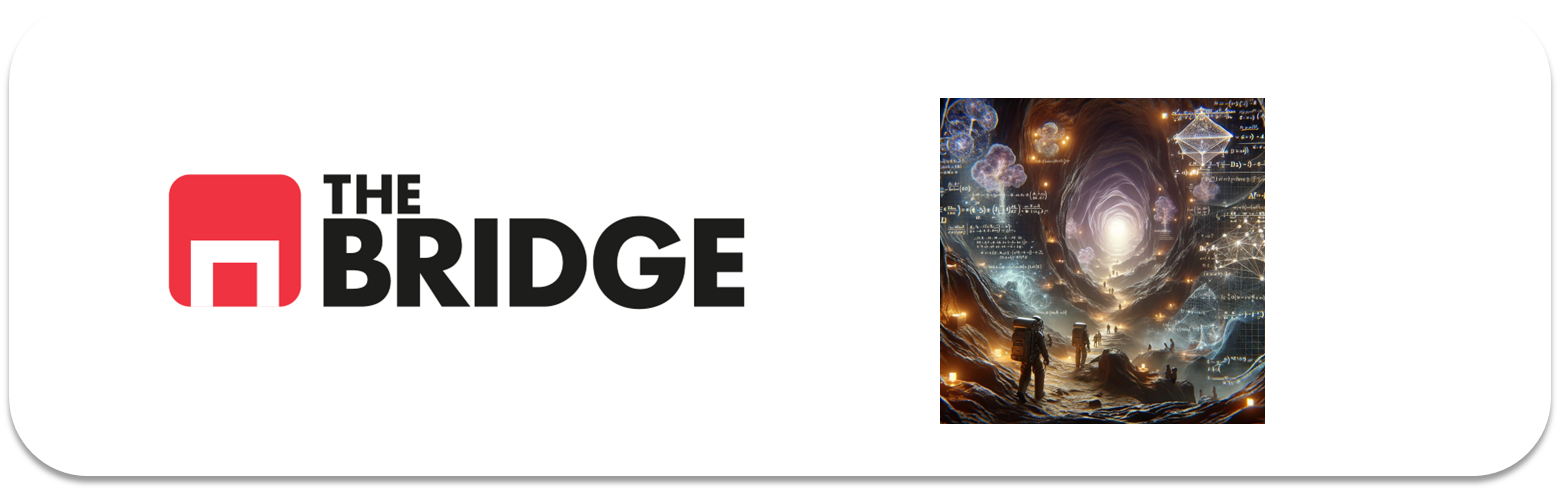

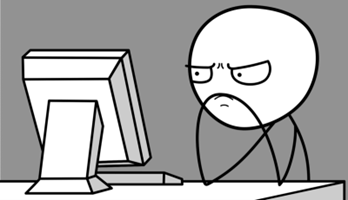

Para ejercitarte y afianzar lo aprendido sobre nuestra **Introducción a Deep Learning**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

**EN PROCESO DE CARGA**

# Bank marketing dataset - Depósito a plazo fijo

En este notebook vamos repasar un modelo que ya hicimos en anteriores ocasiones que nos permitía predecir si un individuo dependiendo de sus características, así como características de la campaña de marketing a la cual se pretende asignarlo, va a adquirir un servicio bancario (en este caso, un depósito a plazo fijo). El objetivo de este ejercicio será, mas allá de obtener un modelo preciso o hacer un análisis de datos exhaustivo, observar las posibles diferencias entre el utilizar un modelo de regresión logística o uno de MLP (multi-layer perceptron) para predecir nuestra variable categórica (sí adquiere, no adquiere).

Obtenemos los datos a partir del "*UCI Machine Learning repository*".

### *Features*:

#### Datos del cliente:

1. **age** (edad)
2. **job** (tipo de trabajo)
3. **marital** (estado marital)
4. **education** (nivel de eduación)
5. **default** (fallo en pagar una deuda)
6. **housing** (si tiene un préstamo de vivienda)
7. **loan** (si tiene un préstamo personal)
8. **balance** (balance personal)

#### Datos del último contacto de la campaña de marketing en curso:

9. **contact** (tipo de contacto)
10. **month** (último mes de contacto)
11. **day** (último día de contacto)
12. **duration** (duración de la llamada en segundos; duration = 0 significa no contactados)

#### Otros

13. **campaign** (número de contactos al cliente hechos en esta campaña)
14. **pdays** (número de días que han pasado desde que el cliente fue contactado en una campaña anterior; 999 o -1 significa que el cliente no ha sido contactado)
15. **previous** (número de contactos realizados antes de esta campaña a el cliente)
16. **poutcome** (resultado de la campaña anterior)
17. **deposit** (target)

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [34]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas.api.types import is_numeric_dtype

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from time import time

### Ejercicios 1

Importa los datos y echa un vistazo rápido. Selecciona la variable target y asignala a una variable "target".

In [22]:
df = pd.read_csv('./data/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [23]:
target = 'deposit'

### Ejercicio 2

Haz el split en train y test y analiza el target.

In [24]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
# Tranformo el target a numerica
target_num = {target: {'no': 0,
                       'yes': 1}}

train_set.replace(target_num, inplace=True)
test_set.replace(target_num, inplace=True)

C:\Users\sorim\AppData\Local\Temp\ipykernel_10864\3132128622.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_set.replace(target_num, inplace=True)


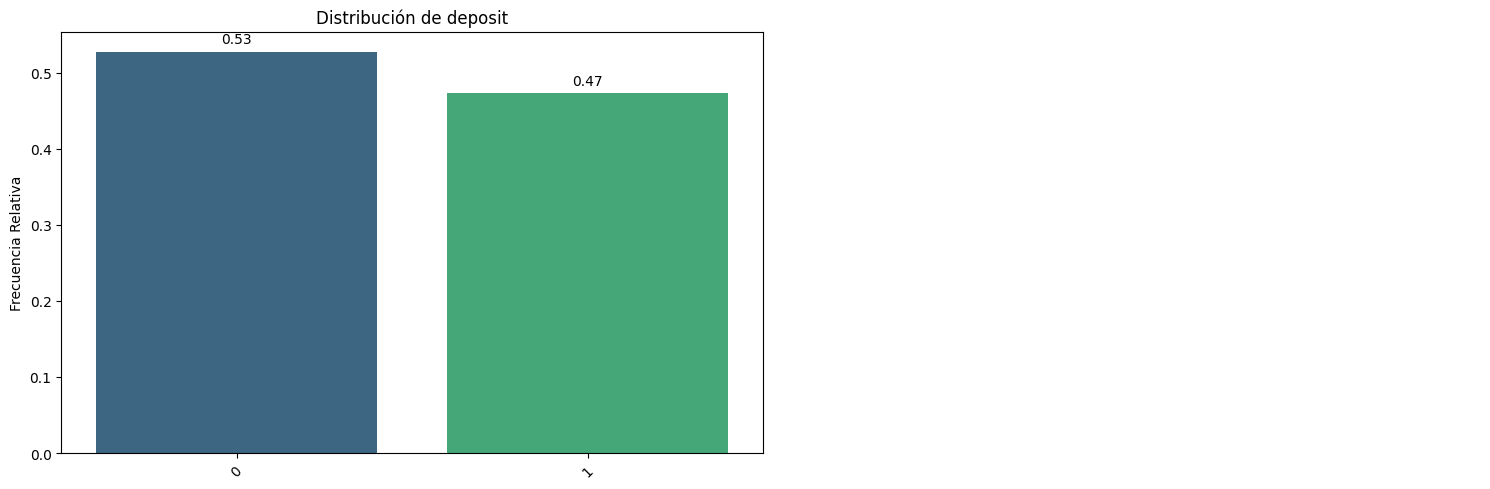

In [28]:
bt.pinta_distribucion_categoricas(train_set, [target], relativa=True, mostrar_valores=True)

In [6]:
# No hay un equilibrio exacto pero esta bastante balanceado

### Ejercicio 3

Tienes múltiples variables tipo object y algunas numéricas, en este caso quédate solo con las variables numéricas y el target. Observa las distribuciones de dichas variables numéricas

In [7]:
train_set.dtypes['age']

dtype('int64')

In [8]:
var_num = [col for col in train_set.columns if is_numeric_dtype(train_set[col])]
var_num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

(7, 2)


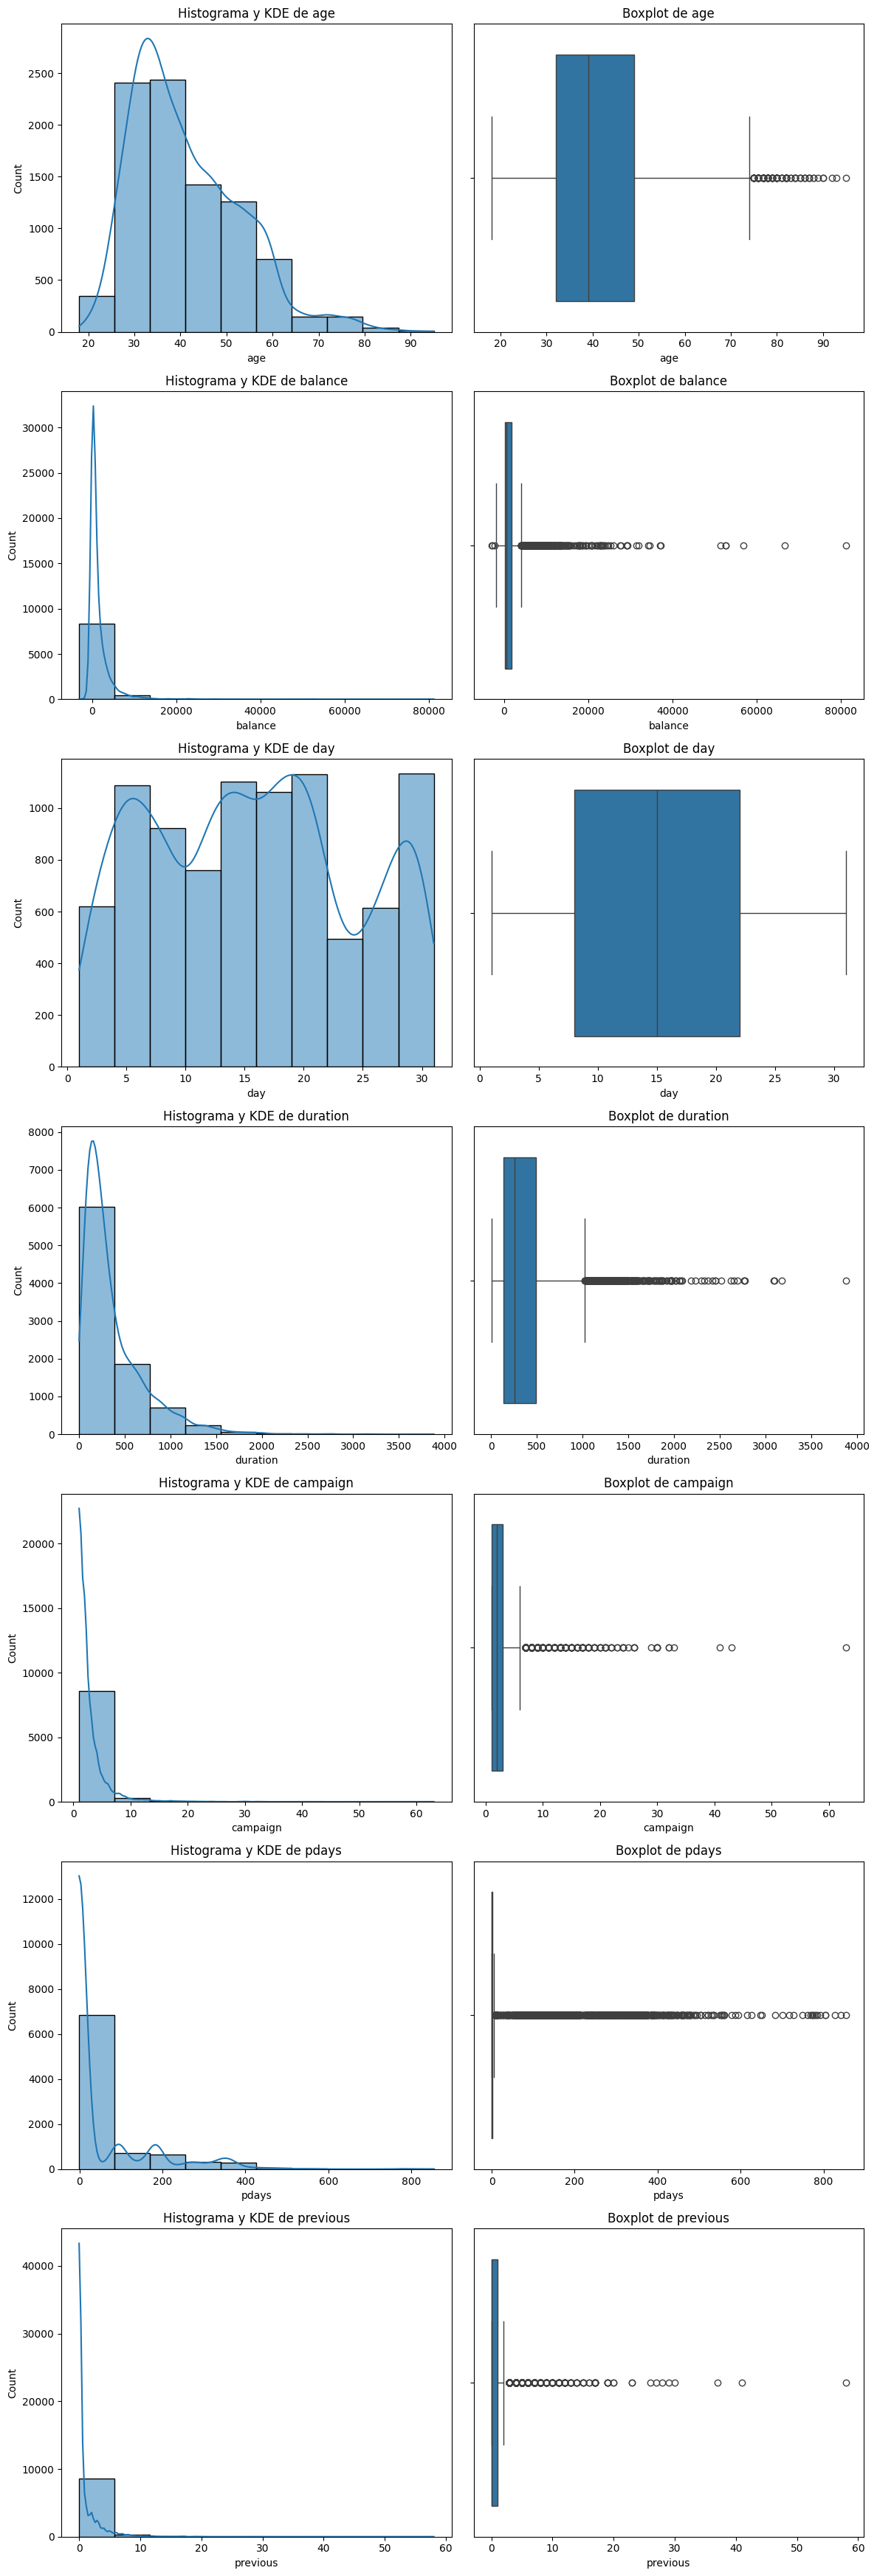

In [9]:
bt.plot_combined_graphs(train_set, var_num, bins=10)

In [10]:
# Hay algunas variables que se podría categorizar por el gran número de outliers que tiene

### Ejercicio 4

A partir de las features del ejercicio 3, realiza una selección de features sencilla, utiliza la técnica que consideres conveniente y quedate con 4 features.

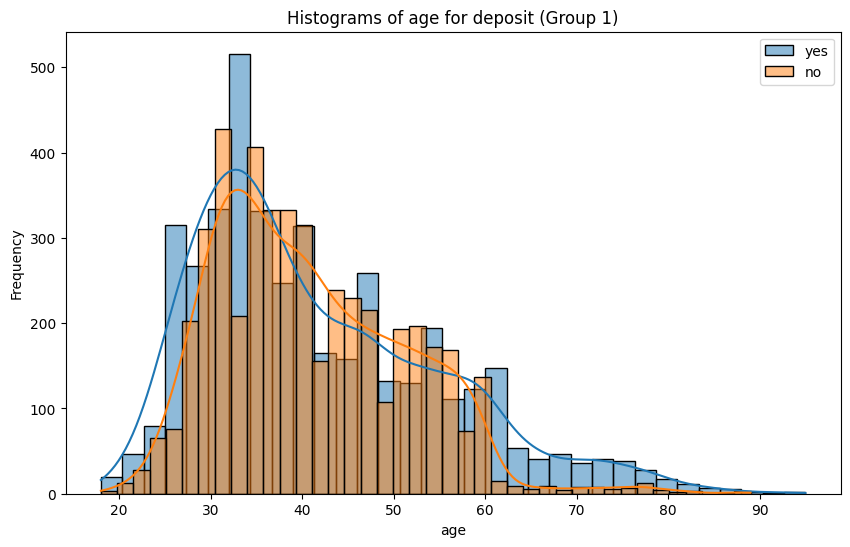

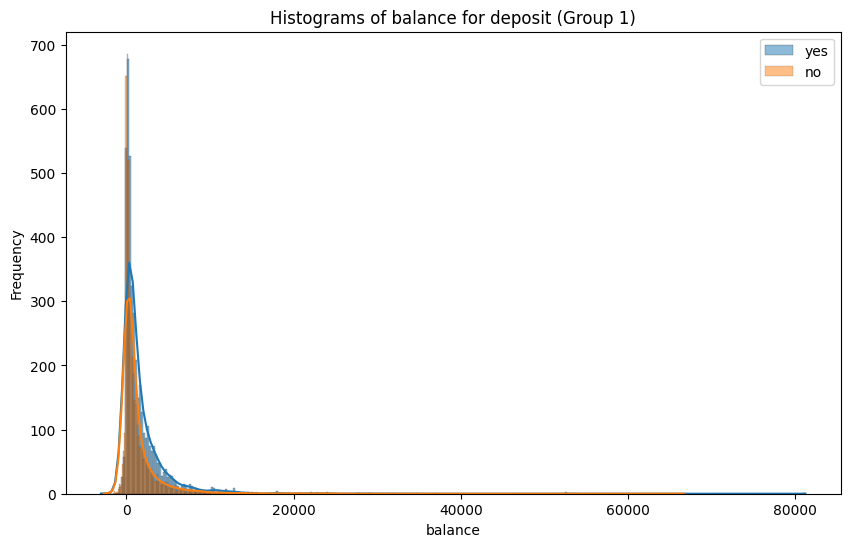

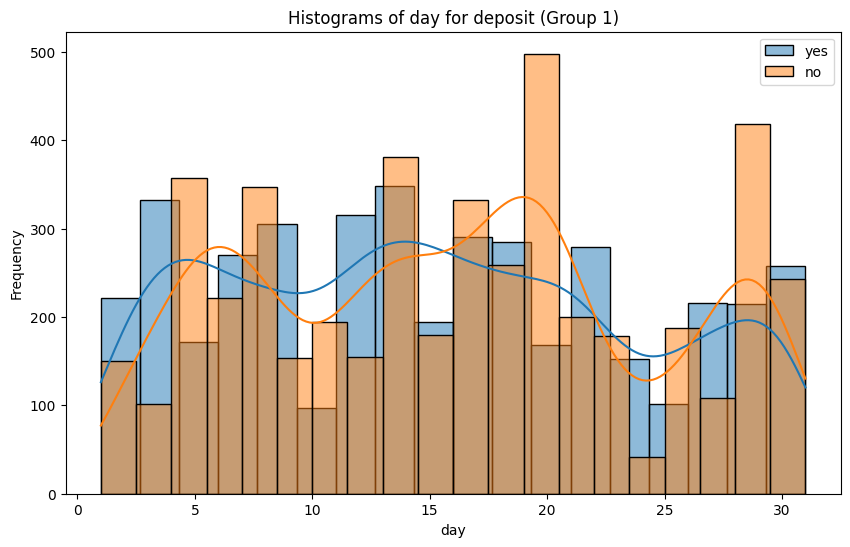

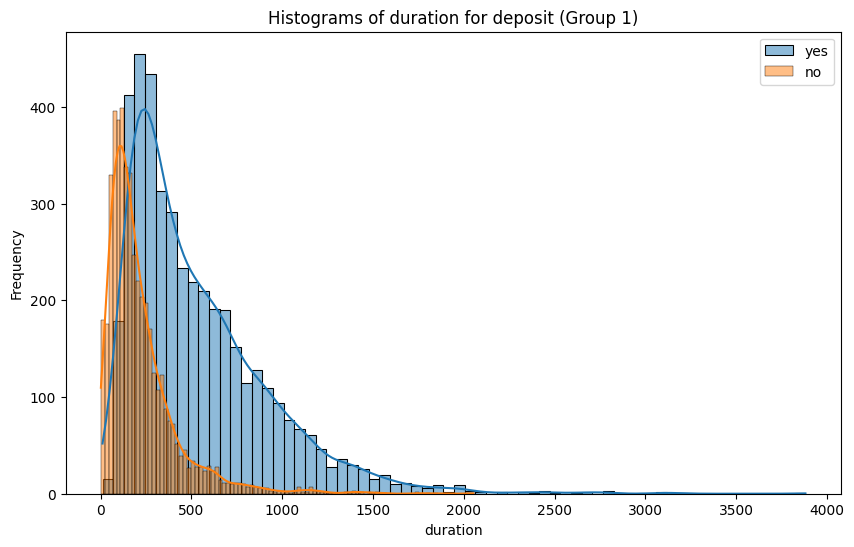

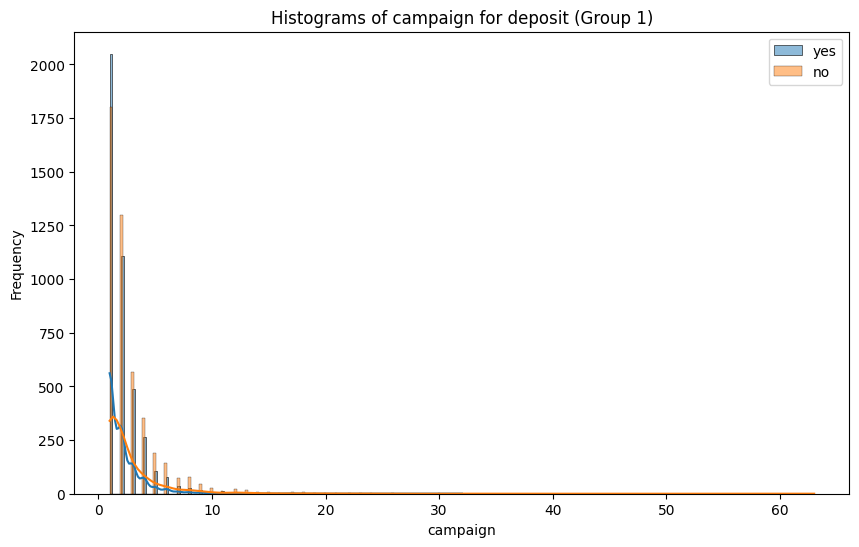

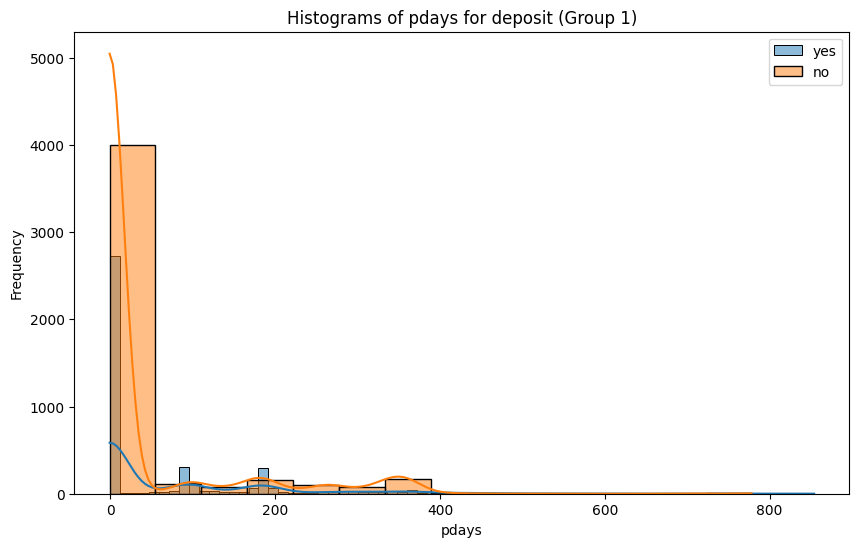

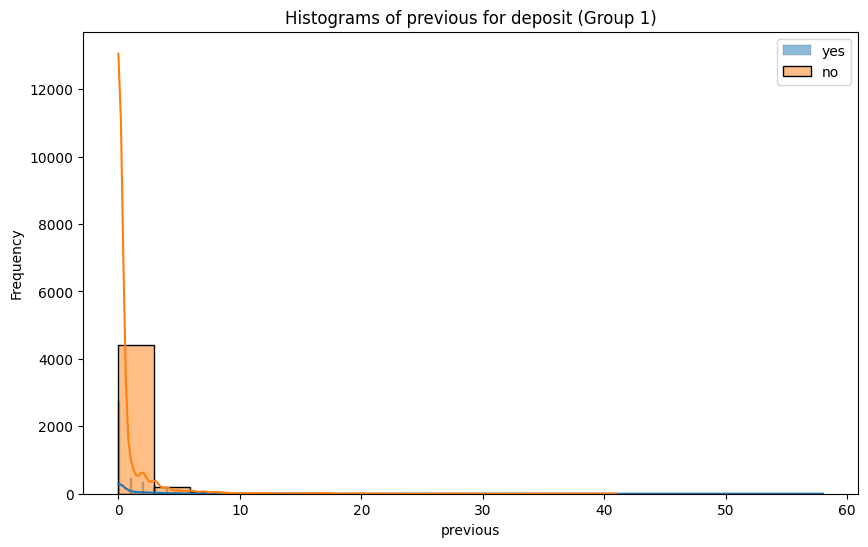

In [11]:
for var in var_num:
    bt.plot_grouped_histograms(train_set, target, var, group_size=2)

In [29]:
features_num = ['age', 'day', 'duration', 'campaign']

### Ejercicio 5

Crea los pares X,y para train y test y escala los datos. ¿Por qué debemos hacerlo?

In [30]:
X_train = train_set[features_num]
y_train = train_set[target]

X_test = test_set[features_num]
y_test = test_set[target]

In [14]:
train_set[features_num].describe()

,age,day,duration,campaign
count,8929.000000,8929.000000,8929.000000,8929.000000
mean,41.242356,15.629970,370.224549,2.506440
std,11.887444,8.445399,345.949019,2.705238
min,18.000000,1.000000,2.000000,1.000000
25%,32.000000,8.000000,138.000000,1.000000
50%,39.000000,15.000000,253.000000,2.000000
75%,49.000000,22.000000,493.000000,3.000000
max,95.000000,31.000000,3881.000000,63.000000


In [31]:
scaler = StandardScaler()

train_set[features_num] = scaler.fit_transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

In [16]:
train_set[features_num].describe()

,age,day,duration,campaign
count,8.929000e+03,8.929000e+03,8.929000e+03,8.929000e+03
mean,-1.881995e-16,4.774618e-18,5.431128e-17,-4.058425e-17
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-1.955312e+00,-1.732398e+00,-1.064449e+00,-5.568916e-01
25%,-7.775325e-01,-9.034976e-01,-6.713057e-01,-5.568916e-01
50%,-1.886429e-01,-7.459743e-02,-3.388682e-01,-1.872176e-01
75%,6.526279e-01,7.543027e-01,3.549145e-01,1.824564e-01
max,4.522474e+00,1.820031e+00,1.014881e+01,2.236290e+01


In [17]:
# Escalamos porque los modelos de DL y de RLogistica son sensibles a las escalas

### Ejercicio 6

 Crea un modelo de regresión logistica y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [32]:
log_rg = LogisticRegression(max_iter=5000)
t_zero = time()

log_rg.fit(X_train, y_train)

t_final = time()
t_entrenamiento = t_final - t_zero

print(f'Tiempo entrenamiento --> {t_entrenamiento} segundos')
print('Score train -->', log_rg.score(X_train, y_train))
print('Score test -->', log_rg.score(X_test, y_test))

Tiempo entrenamiento --> 0.09240579605102539 segundos
Score train --> 0.7221413372158136
Score test --> 0.7075682937751904


### Ejercicio 7

Crea un modelo MLP, con sklearn, con dos hidden layers de 100 neuronas c/u y observa sus métricas. Además, registra su tiempo de entrenamiento y de predicciones

In [33]:
mlp = MLPClassifier(max_iter=500, 
                    activation='tanh',
                    hidden_layer_sizes=(100,100))

t_zero = time()
mlp.fit(X_train, y_train)
t_fin = time()
t_entrenamiento = t_fin - t_zero

print(f'Tiempo de entrenamiento --> {t_entrenamiento} segundos')
print('Score MLP train -->', mlp.score(X_train, y_train))
print('Score MLP test -->', mlp.score(X_test, y_test))

Tiempo de entrenamiento --> 5.669931888580322 segundos
Score MLP train --> 0.7331168103931012
Score MLP test --> 0.7196596506941334


### Ejercicio 8

Compara los dos modelos. En un caso real, ¿Con cuál modelo te quedarías? ¿Por qué?

In [36]:
# El score que es el accuracy me da mejor con MLP, voy a ver el informe de clasificacion

print('Classification Report de R.Log:')
y_pred = log_rg.predict(X_test)
print(classification_report(y_test, y_pred))
print('=====================================')
print('Classification Report de MLP:')
y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

Classification Report de R.Log:
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      1166
           1       0.74      0.60      0.66      1067

    accuracy                           0.71      2233
   macro avg       0.71      0.70      0.70      2233
weighted avg       0.71      0.71      0.70      2233

Classification Report de MLP:
              precision    recall  f1-score   support

           0       0.78      0.65      0.71      1166
           1       0.67      0.80      0.73      1067

    accuracy                           0.72      2233
   macro avg       0.73      0.72      0.72      2233
weighted avg       0.73      0.72      0.72      2233



In [ ]:
# Las métricas no son muy buenas en ninguno de los dos modelos. Seguramente se deba a la eleccion de las features pero si me tengo que queda con alguno de los os, me quedaria con MLP